In [1]:
import warnings
from plot_metric.functions import BinaryClassification
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
from sklearn.model_selection import GridSearchCV, train_test_split
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, recall_score,precision_score, confusion_matrix,classification_report,accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data= pd.read_csv('../z_norm.csv')


### split data en X et Y

In [3]:
data1= data.copy()
X= data1.drop('Loan Status', axis=1)
Y= data1['Loan Status']

In [4]:
X_train , X_test , Y_train , Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 123)


In [5]:
np.unique(Y_train, return_counts=True)

(array([0, 1]), array([45116, 45150]))

### ---KNN---

In [6]:
knn = KNeighborsClassifier()
params={'n_neighbors' : [2, 3, 4, 5, 6, 7, 8],
        'metric': ['minkowski','euclidean','manhattan']}

##accuracy
grid_search_acc= GridSearchCV(estimator=knn, param_grid= params, scoring='accuracy',cv=2, n_jobs=-1)
grid_search_acc= grid_search_acc.fit(X_train, Y_train)
y_predict= grid_search_acc.best_estimator_.predict(X_test)

----------
best parameters:  {'metric': 'manhattan', 'n_neighbors': 7}
----------
[[14766  4594]
 [ 3050 16276]]
----------
              precision    recall  f1-score   support

           0       0.83      0.76      0.79     19360
           1       0.78      0.84      0.81     19326

    accuracy                           0.80     38686
   macro avg       0.80      0.80      0.80     38686
weighted avg       0.80      0.80      0.80     38686

----------


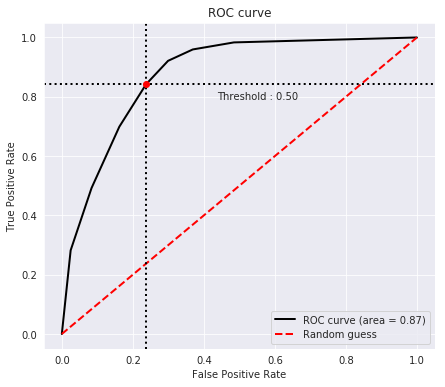

In [7]:
## evaluating the model
print("----------")
print('best parameters: ', grid_search_acc.best_params_)
print("----------")
print(confusion_matrix(Y_test,y_predict))
print("----------")
print(classification_report(Y_test, y_predict))
print("----------")


##ROC
y_predict_proba = grid_search_acc.best_estimator_.predict_proba(X_test)[:,1]

# Visualisation with plot_metric
bc = BinaryClassification(Y_test, y_predict_proba, labels=[1, 0])
# Figures
plt.figure(figsize=(7,6))
bc.plot_roc_curve()
plt.title('ROC curve')
plt.show()

In [8]:
## Recall
rec_avg=make_scorer(recall_score, average='macro')
grid_search_rec= GridSearchCV(estimator=knn, param_grid= params, scoring=rec_avg,cv=2, n_jobs=-1)
grid_search_rec= grid_search_rec.fit(X_train, Y_train)
y_predict= grid_search_rec.best_estimator_.predict(X_test)

In [9]:
## evaluating the model
print("----------")
print('best parameters: ', grid_search_rec.best_params_)
print("----------")
print(confusion_matrix(Y_test,y_predict))
print("----------")
print(classification_report(Y_test, y_predict))
print("----------")

----------
best parameters:  {'metric': 'manhattan', 'n_neighbors': 7}
----------
[[14766  4594]
 [ 3050 16276]]
----------
              precision    recall  f1-score   support

           0       0.83      0.76      0.79     19360
           1       0.78      0.84      0.81     19326

    accuracy                           0.80     38686
   macro avg       0.80      0.80      0.80     38686
weighted avg       0.80      0.80      0.80     38686

----------


In [10]:
## precision
prec_avg=make_scorer(precision_score, average='macro')
grid_search_prec_avg= GridSearchCV(estimator=knn, param_grid= params, scoring=prec_avg,cv=2, n_jobs=-1)
grid_search_prec_avg= grid_search_prec_avg.fit(X_train, Y_train)
y_predict= grid_search_prec_avg.best_estimator_.predict(X_test)

In [11]:
## evaluating the model
print("----------")
print('best parameters: ', grid_search_prec_avg.best_params_)
print("----------")
print(confusion_matrix(Y_test,y_predict))
print("----------")
print(classification_report(Y_test, y_predict))
print("----------")

----------
best parameters:  {'metric': 'manhattan', 'n_neighbors': 7}
----------
[[14766  4594]
 [ 3050 16276]]
----------
              precision    recall  f1-score   support

           0       0.83      0.76      0.79     19360
           1       0.78      0.84      0.81     19326

    accuracy                           0.80     38686
   macro avg       0.80      0.80      0.80     38686
weighted avg       0.80      0.80      0.80     38686

----------


In [12]:
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2, titre):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        #ax.set_ylim([0.74,0.83])
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title(titre, fontsize=18, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=14)
    ax.set_ylabel(titre+'[CV Avg Score]', fontsize=14)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')

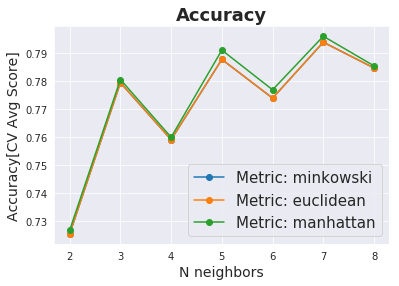

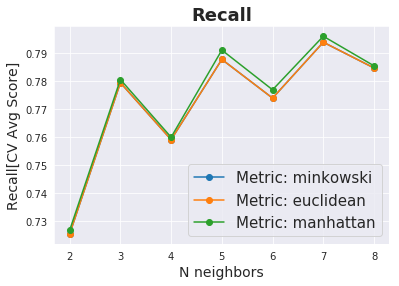

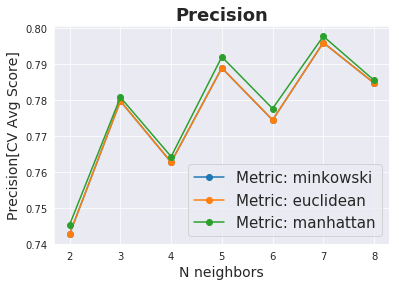

In [13]:
# Calling Method 
plot_grid_search(grid_search_acc.cv_results_, params['n_neighbors'], params['metric'], 'N neighbors', 'Metric', 'Accuracy')
plot_grid_search(grid_search_rec.cv_results_, params['n_neighbors'], params['metric'], 'N neighbors', 'Metric', 'Recall')
plot_grid_search(grid_search_prec_avg.cv_results_, params['n_neighbors'], params['metric'], 'N neighbors', 'Metric', 'Precision')


In [14]:
def return_index_list(param1, param2):
    list=[]
    for p1 in param1:
        for p2 in param2:
            list.append('['+str(p1)+', '+str(p2)+']')
    return list
index= return_index_list(params['metric'], params['n_neighbors'])

In [15]:
df= pd.DataFrame({  'Accuracy': grid_search_acc.cv_results_['mean_test_score'],
                    'Precision(Avg)': grid_search_prec_avg.cv_results_['mean_test_score'],
                    'Recall(Avg)': grid_search_rec.cv_results_['mean_test_score'],
                     'std_cross_validation': grid_search_acc.cv_results_['std_test_score']},
                 index=index)

## to excel
writer = pd.ExcelWriter('KNN.xlsx')
df.to_excel(writer, 'KNN')
writer.save()
writer.close()

In [16]:
df

,Accuracy,Precision(Avg),Recall(Avg),std_cross_validation
"[minkowski, 2]",0.725445,0.742747,0.725495,0.000476
"[minkowski, 3]",0.779430,0.779677,0.779424,0.000532
"[minkowski, 4]",0.759090,0.762661,0.759112,0.000199
"[minkowski, 5]",0.787738,0.788868,0.787727,0.000532
"[minkowski, 6]",0.773913,0.774405,0.773921,0.000931
"[minkowski, 7]",0.793876,0.795907,0.793860,0.001196
"[minkowski, 8]",0.784670,0.784673,0.784669,0.001052
"[euclidean, 2]",0.725445,0.742747,0.725495,0.000476
"[euclidean, 3]",0.779430,0.779677,0.779424,0.000532
"[euclidean, 4]",0.759090,0.762661,0.759112,0.000199


In [17]:
grid_search_acc.cv_results_

{'mean_fit_time': array([0.57427728, 0.51759684, 0.62915516, 0.54414105, 0.46992421,
        0.63248992, 0.58824444, 0.68634617, 1.5171361 , 1.59931421,
        1.78982031, 1.79371369, 1.75264776, 1.68396771, 1.45133257,
        1.52159023, 1.57943475, 1.52601957, 1.53882825, 1.46068442,
        1.55828738]),
 'mean_score_time': array([205.69366741, 237.70929563, 267.92736769, 284.12823284,
        301.65367639, 320.39733076, 330.42111397, 210.8173629 ,
        243.59753156, 254.63534153, 269.29163277, 284.11856949,
        296.89071286, 304.70466733, 281.09035313, 315.15368879,
        320.39086366, 333.40811908, 341.60113525, 327.79040313,
        322.50350618]),
 'mean_test_score': array([0.7254448 , 0.77942969, 0.7590898 , 0.78773846, 0.77391266,
        0.79387588, 0.78466975, 0.7254448 , 0.77942969, 0.7590898 ,
        0.78773846, 0.77391266, 0.79387588, 0.78466975, 0.7267742 ,
        0.78055968, 0.75995391, 0.79106197, 0.77688166, 0.79600292,
        0.78543416]),
 'param_metri